homework 3

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Numpy

## Cosine Similarity
Calculate the cosine similarity of 2 vectors (as numpy arrays).

Give vector $\vec{\mu}$ and vector $\vec{v}$, the cosine similarity of them is 

$$S_{\vec{\mu}\vec{v}}=\frac{\vec{\mu}\cdot\vec{v}}{||\vec{\mu}||_2\times||\vec{v}||_2}$$

Where $||\cdot||_2$ is the L-2 norm.

**<font color='red'>Question:</font>**  Define a CosSim function, with inputs are two one-D arrays, and the output is their cosine similarity.

In [2]:
# your code here
import math
def CosSim(u, v):
    a = np.inner(u,v)
    b = math.sqrt(np.inner(u,u)) * math.sqrt(np.inner(v,v))
    result = a/b
    return result

In [3]:
# validate your results

x = np.linspace(-1,1,100)
y = np.linspace(1,-1,100)

print(
    """The cosine similarity between x and x is {:.5f}
The cosine similarity between x and y is {:.5f}
    """.format(CosSim(x,x), CosSim(x,y))
     )


The cosine similarity between x and x is 1.00000
The cosine similarity between x and y is -1.00000
    


## Linear Algebra

Solve the following Linear equation system:

$$
\begin{cases} 
4x+3y+2z=25\\ 
-2x+2y+3z=-10\\ 
3x-5y+2z=-4\\ 
\end{cases} 
$$

**<font color='red'>Question:</font>** Define a 2-d array $A$ and a 1-d array $b$ according to the above equation, which satisfy $AX=b$, where $X=(x, y, z)^T$

In [5]:
# your code here
A = np.array([[4,3,2],[-2,2,3],[3,-5,2]])
b = np.transpose(np.array([[25,-10,-4]]))
print (A)
print (b)

[[ 4  3  2]
 [-2  2  3]
 [ 3 -5  2]]
[[ 25]
 [-10]
 [ -4]]


**<font color='red'>Question:</font>** Solve the equation, to get the values of $X$. 

Hint: you may use `numpy.linalg.inv()` to get the inverse of a matrix.

In [7]:
np.matmul(np.linalg.inv(A),b)

array([[ 5.],
       [ 3.],
       [-2.]])

# Baby Names Data Analysis

Load the ``baby_name_NY.txt`` dataset, which contains the baby names in New York city.

In [9]:
# load the data
column_names = ['State', 'Sex', 'Year', 'Name', 'Count']
babynames = pd.read_csv("./baby_name_NY.TXT", header=None, names=column_names)

babynames.head(5)

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926


**<font color='red'>Question:</font>** What's the data types of each column?

In [10]:
babynames.dtypes

State    object
Sex      object
Year      int64
Name     object
Count     int64
dtype: object

**<font color='red'>Question:</font>** Find the most popular baby name in IL in 2018

In [11]:
print(babynames[babynames["Year"] == 2018].sort_values("Count",ascending = False).head(1)["Name"].values)

['Liam']


**<font color='red'>Question:</font>**  For female and male, what's the most popular baby names in 2017 respectively?

In [12]:
popM = babynames[((babynames["Sex"] == 'M') & (babynames["Year"] == 2017))].sort_values("Count",ascending = False ).head(1)
popF = babynames[((babynames["Sex"] == 'F') & (babynames["Year"] == 2017))].sort_values("Count",ascending = False ).head(1)
print(popF['Name'].values)
print(popM['Name'].values)

['Olivia']
['Liam']


**<font color='red'>Question:</font>** List all baby names that start with J.

In [13]:
list(babynames.loc[[name.startswith("J") for name in babynames["Name"]],"Name"].values)

['Josephine',
 'Jean',
 'Julia',
 'Jennie',
 'Jane',
 'Joan',
 'Jeanette',
 'Jessie',
 'Jeanne',
 'Jeannette',
 'Janet',
 'Johanna',
 'June',
 'Janice',
 'Judith',
 'Joyce',
 'John',
 'Jacqueline',
 'Jenny',
 'Jessica',
 'Julie',
 'Josephine',
 'Jean',
 'Julia',
 'Jennie',
 'Jane',
 'Jeanette',
 'Jessie',
 'Janet',
 'Joan',
 'Jeanne',
 'Jeannette',
 'Judith',
 'Johanna',
 'June',
 'Joyce',
 'Jenny',
 'Juliette',
 'Janice',
 'John',
 'Jacqueline',
 'Julie',
 'Juliet',
 'Justina',
 'James',
 'Jessica',
 'Joseph',
 'Juanita',
 'Janette',
 'Josephine',
 'Jean',
 'Julia',
 'Jennie',
 'Jane',
 'Jessie',
 'Jeanette',
 'Janet',
 'Jeannette',
 'Joan',
 'Jeanne',
 'Judith',
 'Johanna',
 'June',
 'Joyce',
 'Janice',
 'Juanita',
 'Julie',
 'Juliette',
 'John',
 'Justine',
 'Jenny',
 'Jessica',
 'Joanna',
 'Jerry',
 'Judy',
 'Jacqueline',
 'Joanne',
 'James',
 'Jewel',
 'Josephine',
 'Jean',
 'Julia',
 'Jennie',
 'Jane',
 'Jessie',
 'Jeanette',
 'Janet',
 'Joan',
 'Jeanne',
 'Jeannette',
 'June',
 

**<font color='red'>Question:</font>** Sort names by their length, then print the top 5 by length.

In [15]:
name_index = babynames.Name.str.len().sort_values(ascending = False).index
babynames.reindex(name_index).head(5)["Name"].values

array(['Michaelanthony', 'Maryelizabeth', 'Marycatherine',
       'Maryelizabeth', 'Samanthamarie'], dtype=object)

**<font color='red'>Question:</font>** Name whose popularity has changed the most.

**Hint**: First you may need to define change in popularity, i.e., for each name, you need to find the difference between the name's maximum occurrence and minimum occurrence. 

In [17]:
def difference(x):
    return x.max()-x.min()
name = babynames.groupby('Name').Count.apply(difference)
name.sort_values(ascending = False).head(1)

Name
Robert    10020
Name: Count, dtype: int64

# Single variable analysis

The `Salaries.csv` dataset contains the salaries of employees in San Francisco, see details [here](https://transparentcalifornia.com/salaries/san-francisco/).

**<font color='red'>Question:</font>** Read the data using pandas, save it as a Dataframe called `Salaries_df`

In [18]:
Salaries_df = pd.read_csv("Salaries.csv")

Salaries_df

,Id,EmployeeName,TotalPayBenefits,Year
0,1,NATHANIEL FORD,567595.43,2011
1,2,GARY JIMENEZ,538909.28,2011
2,3,ALBERT PARDINI,335279.91,2011
3,4,CHRISTOPHER CHONG,332343.61,2011
4,5,PATRICK GARDNER,326373.19,2011
...,...,...,...,...
148649,148650,Roy I Tillery,0.00,2014
148650,148651,Not provided,0.00,2014
148651,148652,Not provided,0.00,2014
148652,148653,Not provided,0.00,2014


**<font color='red'>Question:</font>** Make a bar plot to show the number of DataRecords by year.

<AxesSubplot:>

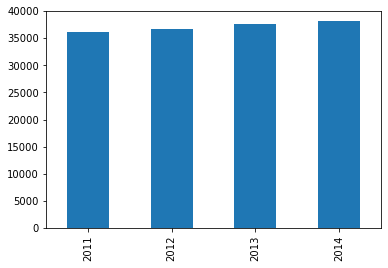

In [20]:
Salaries_df.loc[:,"Year"].value_counts(sort = False).plot(kind = 'bar')

**<font color='red'>Question:</font>** Make a histogram to show distribution of the variable `TotalPayBenefits`.

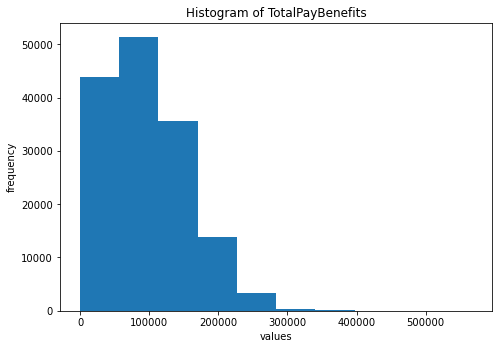

In [51]:
fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([1, 1, 1, 1]) # left, bottom, width, height (range 0 to 1)
n, bins, patches=plt.hist(Salaries_df["TotalPayBenefits"])

axes.set_xlabel('values')
axes.set_ylabel('frequency')
axes.set_title('Histogram of TotalPayBenefits');

**<font color='red'>Question:</font>** Calculate the (min, 1st quartile, median, 3rd quartile, max) of the variable `TotalPayBenefits`.

In [23]:
Smin = Salaries_df["TotalPayBenefits"].min()
Smax = Salaries_df["TotalPayBenefits"].max()
quartiles = np.percentile(Salaries_df["TotalPayBenefits"], [25, 50, 75])
(Smin,quartiles[0],quartiles[1],quartiles[2],Smax)

(-618.13, 44065.65, 92404.09, 132876.45, 567595.43)

**<font color='red'>Question:</font>** Make a box plot for the variable `TotalPayBenefits`.

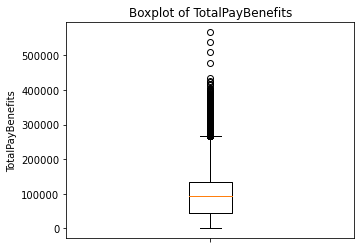

In [57]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot(Salaries_df["TotalPayBenefits"]);

axes.set_ylabel('TotalPayBenefits')
axes.set_xticklabels('')
axes.set_title('Boxplot of TotalPayBenefits');

**<font color='red'>Question:</font>** What you can conclude from the box plot above?

There are four outliers.

# The end